K-MEANS CLUSTERS

It is an unsupervised learning. The term K is a number, if it is 2 clusters k =2.
Step 1:
Two points are randomly assigned as CENTROID. these points can be anywhere.
Step2: 
For every point the distance is measured from both centroids to select teh centroid that is closer to it.
Step3:
Center points of the points is determined by recalculation of each points i.e the real CENTROID IS DETERMINED.
Step4:
Each points are repositioned inline with the new centroids
Step5: is repeated u until the centroid is same for more than once.
    


Types of Clustering:
    1. Hierarchical clustering (Agglomerative and Divisive)
    2. Partitional Clustering (K-Means and Fuzzy C-Means, the diff betw k-means and fuzzy c-means is taht object can belog to more than one cluster under fuzzy c-means)
    
    
    

K-Means uses Disannce measures. such eUCLIDEAN---Distance between two points.
SQuared Euclidean, Manhattan distance measure and Cosine distance DM.


HOW K-MEANS CLUSTERING WORK

Start---Elbow Point(k)--Measure the distance--Grouping based on minimum distance---Reposition the centroids

In [2]:
#K-Means practical

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

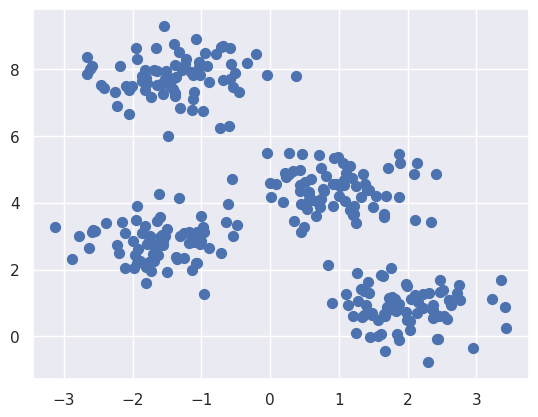

In [23]:
### Old module name :from  sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:,1], s=50);

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [25]:
y_kmeans

array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
       3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
       3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
       2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
       1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
       2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2,
       1, 3, 0, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 3], d

In [30]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        #2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        #2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        #2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        return centers, labels
    centers ,labels = find_clusters(X, 4)
    plt.scatter(X[:,0], X[:, 1], c=y_kmeans, s=50, cmap='virdis')
    
    plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);
    

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 4.8 MB/s eta 0:00:00 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.2 MB/s eta 0:00:005 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


##USE K-MEANS FOR COLOR COMPRESSION

In [6]:
#Choose a random subset
# Initialize
cl = Clustimage()

# Load example dataset
data = cl.import_example(data='flowers')
rng = np.random.RandomState(0)
i = rng.permutation(data.shape[0])[ :N]
colors = colors[i]
R , G, B =data[i].T

fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].scatter(R, G, color=colors, marker='.')
ax[0].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

ax[1].scatter(R, B, color=colors, marker='.')
ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
fig.suptitle(title, size=20);

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Import dataset [flowers]
[clustimage] >INFO> Downloading [flower_images.zip] dataset from github source..
[clustimage] >INFO> Extracting files..
[clustimage] >INFO> [214] files are collected recursively from path: [/home/cf403cb0-d00e-44ec-badd-ebac30933e41/.local/lib/python3.11/site-packages/datazets/data/flower_images]


AttributeError: 'list' object has no attribute 'shape'